<p align="center"><img src="https://www.muitotudo.com/wp-content/uploads/2013/04/ulbra.jpg" alt="imagem do logo da ulbra" height="100px" width="80%"></p>
<br><br>

# Rede Neural para previsão de resultados de futebol 
Neste projeto foi proposto a criação de uma Rede Neural em Python para a previsão de resultados esportivos (futebol), onde utilizamos as bibliotecas pandas e scikit-learn como apoio a construção de uma RN de aprendizagem supervisionada.


<p align="center"><img src="https://scikit-learn.org/stable/_images/scikit-learn-logo-notext.png" alt="imagem do logo da bilioteca scikit learn" height="100px"></p>

 **Scikit learn** (Sklearn) é a biblioteca mais útil e robusta para aprendizado de máquina em Python. Ele fornece uma seleção de ferramentas eficientes para aprendizado de máquina e modelagem estatística, incluindo classificação, regressão, clustering e redução de dimensionalidade através de uma interface de consistência em Python. Esta biblioteca, que é em grande parte escrita em Python, é construída sobre NumPy, SciPy e Matplotlib.


<br><br><p align="center"><img src="https://warehouse-camo.ingress.cmh1.psfhosted.org/705545a847e60d6d4478c76a8146b9000e339c1c/68747470733a2f2f70616e6461732e7079646174612e6f72672f7374617469632f696d672f70616e6461732e737667" alt="imagem do logo da bilioteca pandas" height="100px"></p>
 **Pandas** é um pacote Python que fornece estruturas de dados rápidas, flexíveis e expressivas, projetadas para tornar o trabalho com dados "relacionais" ou "rotulados" tanto fáceis quanto intuitivos. Ele visa ser o bloco fundamental de construção de alto nível para fazer análise prática de dados do mundo real em Python. Além disso, tem o objetivo mais amplo de se tornar a ferramenta de análise/manipulação de dados de código aberto mais poderosa e flexível disponível em qualquer idioma. Já está bem a caminho desse objetivo.

# Importando as bibliotecas que serão utilizadas no projeto

In [ ]:
# importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Dados utilizados no projeto
 
O dataset escolhido para ser utilizado no projeto, são os dados do Campeonato Espanhol das últimas 3 temporadas (2019/20, 2020/21 e 2021/22), eles foram baixados de forma separada e agrupados pelo grupo. Esses dados foram coletados do repositório [football-data](https://www.football-data.co.uk/spainm.php), que é um site de estatísticas que disponibiliza de forma gratuita os dados de diversos campeonatos de futebol pelo mundo.




In [ ]:
# dados do campeonato espanhol
# Para executar essa célula é preciso 
dados = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/previsao_esportiva/CampeonatoEspanhol.xlsx")

# Exploração dos dados
Depois de escolhermos e importarmos nosso dataset, iremos explorar e entender os dados existentes, para definir quais os melhores dados a serem utilizados no treinamento.

### Rótulos

O campo Resultado de nosso dataset, que será utilizado como rótulo para nossa previsão posteriormente, possuia H(home), D(draw) e A(away), para representar os resultados. Como ela estava em string, foi necessário alterar para um valor numérico, e os valores escolhidos foram os seguintes:

**Resultado**

Vitória mandante = 1

Vitória visitante = 2

Empate = 0

In [ ]:
# Mostrando as 5 primeiras e últimas linhas do nosso dataset
display(dados)

,ID_Jogo,Data,Time_da_casa,Time_visitante,Gols_casa,Gols_visitante,Resultado,GC_intervalo,GV_intervalo,Res_intervalo,...,Vermelho_visitante,B365H,B365D,B365A,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,1.0,2019-08-16,Ath Bilbao,Barcelona,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,5.25,0.00,1.65,0.00,3.95,1.76,0.00,3.81,1.71
1,2.0,2019-08-17,Celta,Real Madrid,1.0,3.0,2.0,0.0,1.0,2.0,...,1.0,4.75,0.00,1.65,0.00,0.00,1.73,4.67,0.00,1.69
2,3.0,2019-08-17,Valencia,Sociedad,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.66,3.75,0.00,1.72,3.98,5.75,1.68,0.00,5.29
3,4.0,2019-08-17,Mallorca,Eibar,2.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,2.91,0.00,2.62
4,5.0,2019-08-17,Leganes,Osasuna,0.0,1.0,2.0,0.0,0.0,0.0,...,0.0,2.00,0.00,0.00,0.00,0.00,4.25,0.00,3.18,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,1136.0,2022-05-22,Granada,Espanol,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.44,4.33,0.00,0.00,0.00,0.00,1.45,4.66,0.00
1136,1137.0,2022-05-22,Osasuna,Mallorca,0.0,2.0,2.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.00,0.00,0.00,2.26,3.39,3.38,0.00
1137,1138.0,2022-05-22,Barcelona,Villarreal,0.0,2.0,2.0,0.0,1.0,2.0,...,0.0,0.00,4.00,3.00,2.21,4.22,3.39,0.00,3.94,3.15
1138,1139.0,2022-05-22,Sevilla,Ath Bilbao,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.00,0.00,2.87,0.00,3.46,2.98,2.52,3.29,2.91


In [ ]:
# verificando os tipos de dados do nosso dataset
display(dados.dtypes)

ID_Jogo                        float64
Data                    datetime64[ns]
Time_da_casa                    object
Time_visitante                  object
Gols_casa                      float64
Gols_visitante                 float64
Resultado                      float64
GC_intervalo                   float64
GV_intervalo                   float64
Res_intervalo                  float64
Chutes_casa                    float64
Chutes_visitante               float64
CC_alvo                        float64
CV_alvo                        float64
Faltas_CC                      float64
Faltas_CV                      float64
Escanteios_casa                float64
Escanteios_visitante           float64
Amarelos_casa                  float64
Amarelos_visitante             float64
Vermelho_casa                  float64
Vermelho_visitante             float64
B365H                          float64
B365D                          float64
B365A                          float64
MaxH                     

## Identificando o volume dos dados de nosso dataset 

In [ ]:
quantidade_de_jogos = dados.shape[0]
casa_ganhou = len(dados[dados.Resultado==1])
fora_ganhou = len(dados[dados.Resultado==2])
empate = len(dados[dados.Resultado==0])
porcentagem_casa = (float(casa_ganhou)/quantidade_de_jogos) * 100
porcentagem_fora = (float(fora_ganhou)/quantidade_de_jogos) * 100
porcentagem_empate = (float(empate)/quantidade_de_jogos) * 100
resultados = [casa_ganhou,fora_ganhou,empate]

print("===================================================")
print("Total de jogos: ", quantidade_de_jogos)
print("Total de vitórias do time da casa: ", casa_ganhou)
print("Total de vitórias do time visitante: ", fora_ganhou)
print("Total de empates: ", empate)
print("")
print("Porcentagem de vitórias do time da casa: {:.2f}%".format(porcentagem_casa))
print("Porcentagem de vitórias do time visitante: {: .2f}%".format(porcentagem_fora))
print("Porcentagem de empates {: .2f}%".format(porcentagem_empate))
print("===================================================")

Total de jogos:  1140
Total de vitórias do time da casa:  497
Total de vitórias do time visitante:  318
Total de empates:  325

Porcentagem de vitórias do time da casa: 43.60%
Porcentagem de vitórias do time visitante:  27.89%
Porcentagem de empates  28.51%


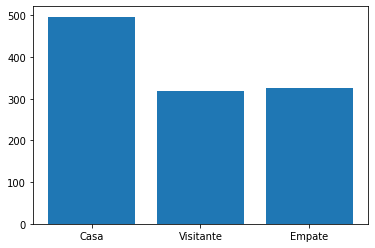

In [ ]:
x = np.arange(3)
plt.bar(x, resultados)
plt.xticks(x, ("Casa", "Visitante", "Empate"))
plt.show()

In [ ]:
# verificando se existe algum dado nulo no nosso dataset
(dados.isnull().sum() / dados.shape[0]).sort_values(ascending=False)

ID_Jogo                 0.0
Escanteios_casa         0.0
AvgD                    0.0
AvgH                    0.0
MaxA                    0.0
MaxD                    0.0
MaxH                    0.0
B365A                   0.0
B365D                   0.0
B365H                   0.0
Vermelho_visitante      0.0
Vermelho_casa           0.0
Amarelos_visitante      0.0
Amarelos_casa           0.0
Escanteios_visitante    0.0
Faltas_CV               0.0
Data                    0.0
Faltas_CC               0.0
CV_alvo                 0.0
CC_alvo                 0.0
Chutes_visitante        0.0
Chutes_casa             0.0
Res_intervalo           0.0
GV_intervalo            0.0
GC_intervalo            0.0
Resultado               0.0
Gols_visitante          0.0
Gols_casa               0.0
Time_visitante          0.0
Time_da_casa            0.0
AvgA                    0.0
dtype: float64

## Matriz de Correlação
Neste trecho de código podemos ver a correlação entre os dados, mostrando tanto a relação entre os dados do time da casa, quando do time visitante.

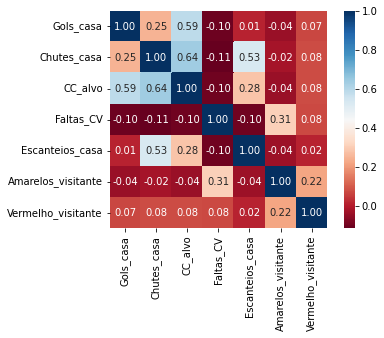

In [ ]:
# matriz de correlação dos dados do time da casa
corr_casa = dados[["Gols_casa", "Chutes_casa", "CC_alvo", "Faltas_CV", "Escanteios_casa", "Amarelos_visitante", "Vermelho_visitante"]].corr()

sns.heatmap(corr_casa, cmap = "RdBu", fmt = ".2f", square = True, linecolor = "white", annot = True);

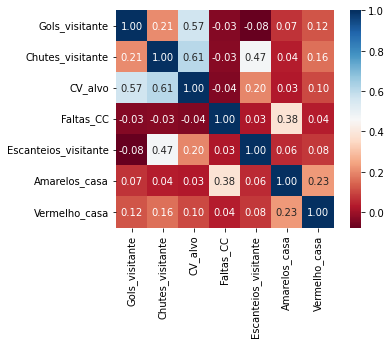

In [ ]:
# matriz de correlação dos dados do time visitante
corr_visitante = dados[["Gols_visitante", "Chutes_visitante", "CV_alvo", "Faltas_CC", "Escanteios_visitante", "Amarelos_casa", "Vermelho_casa"]].corr()

sns.heatmap(corr_visitante, cmap = "RdBu", fmt = ".2f", square = True, linecolor = "white", annot = True);

### Preparação dos Dados
Agora que já conhecemos nossos dados, iremos realizar as alterações necessárias para o treinamento de nossa Rede Neural.

In [ ]:
# Excluindo informações que não utilizaremos
campeonato_espanhol = dados.drop(["Data", "B365H", "B365D", "B365A", "MaxH", "MaxD", "MaxA" , "AvgH", "AvgD", "AvgA"], axis=1)

In [ ]:
# Escolhendo as caracteirsticas  
caracteristicas = campeonato_espanhol.drop(["ID_Jogo","Resultado","Gols_casa","Gols_visitante","GC_intervalo","GV_intervalo","Res_intervalo", "Time_da_casa", "Time_visitante"], axis=1)

# Seperando os rótulos
rotulos = campeonato_espanhol["Resultado"]

print("Features")
print(caracteristicas.keys())

Features
Index(['Chutes_casa', 'Chutes_visitante', 'CC_alvo', 'CV_alvo', 'Faltas_CC',
       'Faltas_CV', 'Escanteios_casa', 'Escanteios_visitante', 'Amarelos_casa',
       'Amarelos_visitante', 'Vermelho_casa', 'Vermelho_visitante'],
      dtype='object')


## SelectKBest
Aqui utilizaremos o **SelectKBest** para escolher as melhores características do dataset, ou seja, esse método irá receber as variáveis e o rótulo do nosso dataset e retornará as que tem melhor pontuação, removendo as variáveis de menor pontuação.

Após, chamamos o método SelectKBest(k='all') e passamos as características e os resultados, afim dele comparar, então utilizamos a função zip, para criar uma lista com a característica e o score dela e printamos em forma decrescente.

In [ ]:
# Escolhendo as melhores caracteristicas com Kbest
lista_de_variaveis = ("Chutes_casa", "Chutes_visitante", "CC_alvo", "CV_alvo", "Faltas_CC", "Faltas_CV", "Escanteios_casa", "Escanteios_visitante", "Amarelo_casa", "Amarelo_visitante", "Vermelho_casa", "Vermelho_visitante")

k_best_features = SelectKBest(k="all")
k_best_features.fit_transform(caracteristicas, rotulos)
scores = k_best_features.scores_

raw_pairs = zip(lista_de_variaveis[0:], scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))
k_best_features_final = dict(ordered_pairs[:21])


print("Melhores features:")
print(k_best_features_final)


Melhores features:
{'CV_alvo': 105.89256697467162, 'CC_alvo': 97.57748453678106, 'Chutes_casa': 11.058750108697888, 'Vermelho_casa': 10.904194568195692, 'Chutes_visitante': 9.032080806354891, 'Faltas_CV': 6.666789792493605, 'Amarelo_casa': 5.194508492847678, 'Amarelo_visitante': 3.1706873897153898, 'Escanteios_visitante': 2.48575759158914, 'Vermelho_visitante': 1.2985572445556548, 'Escanteios_casa': 1.0010056475214948, 'Faltas_CC': 0.2664037370362911}


## Normalizando os dados

Para esta etapa utilizaremos o método **MinMaxScalar()**, que basicamente dimensiona todos os recursos de dados no intervalo [0, 1].

In [ ]:
# Normalizando os dados de entrada(features)

# Gerando o novo padrão
scaler = MinMaxScaler().fit(caracteristicas)
features_scale = scaler.transform(caracteristicas)

print("Features: ",features_scale.shape)
print(features_scale)

Features:  (1140, 12)
[[0.26470588 0.40740741 0.29411765 ... 0.125      0.         0.        ]
 [0.14705882 0.62962963 0.23529412 ... 0.25       0.         0.5       ]
 [0.35294118 0.44444444 0.35294118 ... 0.5        0.5        0.        ]
 ...
 [0.35294118 0.14814815 0.17647059 ... 0.125      0.         0.        ]
 [0.32352941 0.33333333 0.17647059 ... 0.375      0.         0.        ]
 [0.29411765 0.22222222 0.17647059 ... 0.25       0.         0.        ]]


### Separação dos dados

Vamos então utilizar o método **train_test_split()** para separar os dados de treinamento e de teste. 

Nós escolhemos separar 70% dos dados para o treinamento e 30% para o teste. 

In [ ]:
#Separa em treinamento e teste

x_train, x_test, y_train, y_test = train_test_split(features_scale, rotulos, test_size = 0.3, random_state = 0)
print( len(x_train), len(y_train))

print( len(x_test), len(y_test))

798 798
342 342


# RandomForestClassifier

**RandomForestClassifier** consiste em múltiplas árvores de decisão. Além disso, ele usa aleatoriedade para aumentar sua precisão e combater o excesso de adaptação, o que pode ser um grande problema para um algoritmo tão sofisticado. Esses algoritmos tomam árvores de decisão com base em uma seleção aleatória de amostras de dados e obtêm previsões de cada árvore. Depois disso, eles selecionam a melhor solução viável.
 O algoritmo gera as árvores de decisão individuais através de uma indicação de seleção de atributos. Cada árvore depende de uma amostra aleatória independente. Em um problema de classificação, cada árvore vota e a classe mais popular é o resultado final. Por outro lado, em um problema de regressão, você calculará a média de todas as saídas de árvores e esse seria o seu resultado final.

 
**n_estimators** é a quantidade de arvores de nossa floresta.

**min_samples_leaf** é o número mínimo de amostras necessárias para estar em um nó de folha.

**random_state** controla a aleatoriedade da escolha das amostras utilizadas na construção de árvores.


In [ ]:
#Treinando e testando os modelos
modelo = RandomForestClassifier(n_estimators=1000, min_samples_leaf=2, random_state=0)

modelo.fit(x_train, y_train)
previsao = modelo.predict(x_test)

acuracia = accuracy_score(y_test, previsao)
precisao = precision_score(y_test, previsao, average = "micro")

print("RandomForestClassifier validações:")
print("Acurácia: {}".format(acuracia))
print("Precisão: {}" .format(precisao))

RandomForestClassifier validações:
Acurácia: 0.5730994152046783
Precisão: 0.5730994152046783


# Previsão

Aqui iremos testar nosso modelo, para analisar como ele prevê nosso dataset e comparar com os dados reias, com o intuito de verificar suas previsões.

In [ ]:
# Prevendo os resultados 
previsao = features_scale[0:]

time_visitante = campeonato_espanhol["Time_da_casa"]
time_mandante = time_visitante[0:]

time_visitante = campeonato_espanhol["Time_visitante"]
time_visitante = time_visitante[0:]

resultado = campeonato_espanhol["Resultado"]
resultado = resultado[0:]

prev = modelo.predict(previsao)

df = pd.DataFrame({"time_mandate": time_mandante, "time_visitante": time_visitante, "real": resultado, "previsao": prev})

print(df.head(50))

   time_mandate time_visitante  real  previsao
0    Ath Bilbao      Barcelona   1.0       1.0
1         Celta    Real Madrid   2.0       2.0
2      Valencia       Sociedad   0.0       1.0
3      Mallorca          Eibar   1.0       1.0
4       Leganes        Osasuna   2.0       2.0
5    Villarreal        Granada   0.0       1.0
6        Alaves        Levante   1.0       1.0
7       Espanol        Sevilla   2.0       2.0
8         Betis     Valladolid   2.0       0.0
9    Ath Madrid         Getafe   1.0       1.0
10      Granada        Sevilla   2.0       2.0
11      Levante     Villarreal   1.0       1.0
12      Osasuna          Eibar   0.0       0.0
13  Real Madrid     Valladolid   0.0       0.0
14        Celta       Valencia   1.0       1.0
15       Getafe     Ath Bilbao   0.0       1.0
16       Alaves        Espanol   0.0       0.0
17     Mallorca       Sociedad   2.0       2.0
18      Leganes     Ath Madrid   2.0       0.0
19    Barcelona          Betis   1.0       1.0
20      Sevil

# Gerando as probabilidades sobre nosso dataset

Agora que já temos nosso modelo treinado e com as previsões feitas, veremos as probabilidades por ele gerada para os dados do nosso dataset

In [ ]:
# Prevendo as probabilidades
previsao = features_scale[0:]

time_visitante = campeonato_espanhol['Time_da_casa']
time_mandante = time_visitante[0:]

time_visitante = campeonato_espanhol['Time_visitante']
time_visitante = time_visitante[0:]

resultado = campeonato_espanhol['Resultado']
resultado = resultado[0:]

prev = modelo.predict(previsao)
proba = modelo.predict_proba(previsao)
proba = proba[0:]

print("")
print("                      Probabilidades")
print("==========================================================")
print("   Vitoria casa    |    Vitoria visitante   |   Empate   |")
for p in proba:
  print("\t{:.1f}% \t\t\t{:.1f}% \t\t{:.1f}%".format(p[1]*100, p[2]*100, p[0]*100))




                      Probabilidades
   Vitoria casa    |    Vitoria visitante   |   Empate   |
	80.6% 			7.4% 		12.0%
	20.1% 			52.4% 		27.5%
	48.9% 			20.9% 		30.2%
	60.7% 			22.6% 		16.8%
	15.0% 			54.9% 		30.1%
	45.4% 			31.6% 		23.0%
	70.4% 			11.8% 		17.8%
	12.1% 			63.4% 		24.4%
	25.0% 			28.7% 		46.2%
	67.3% 			7.7% 		25.0%
	3.3% 			91.6% 		5.2%
	57.0% 			31.2% 		11.9%
	24.7% 			12.9% 		62.4%
	36.3% 			10.4% 		53.3%
	69.3% 			7.9% 		22.7%
	53.9% 			10.0% 		36.1%
	26.5% 			7.6% 		66.0%
	30.0% 			50.8% 		19.2%
	32.7% 			32.8% 		34.5%
	71.8% 			5.6% 		22.7%
	24.3% 			5.6% 		70.1%
	76.2% 			9.6% 		14.2%
	26.4% 			14.6% 		59.0%
	18.2% 			9.2% 		72.6%
	60.4% 			14.8% 		24.8%
	64.3% 			23.5% 		12.2%
	75.5% 			8.7% 		15.8%
	44.4% 			14.3% 		41.3%
	13.3% 			73.6% 		13.0%
	33.0% 			10.4% 		56.7%
	18.8% 			50.3% 		30.9%
	75.9% 			9.4% 		14.7%
	26.9% 			53.3% 		19.7%
	80.6% 			10.1% 		9.3%
	85.3% 			4.2% 		10.4%
	12.0% 			55.9% 		32.2%
	9.8% 			77.6% 		12.6%
	12.1% 			73.3% 		14.6%
	11.4%

# Matriz de Confusão

**Matriz de Confusão** é uma tabela com linhas e colunas que relata o número de falsos positivos , falsos negativos , verdadeiros positivos e verdadeiros negativos . Isso permite uma análise mais detalhada do que a mera proporção de classificações corretas (precisão).

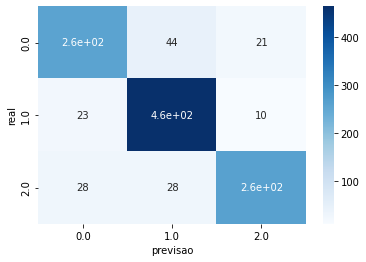

In [ ]:
# Matrix de Confusão

df=pd.DataFrame(df,columns=["real","previsao" ])

cf_matrix=pd.crosstab(df["real"], df["previsao"], rownames=["real"] , colnames=["previsao"])

sns.heatmap(cf_matrix, annot=True, cmap='Blues')

# Testando a rede neural
 
Para testarmos a RN, precisamos passar 12 parâmetros de entrada, são eles: Chutes do time da casa, chutes do time visitante, chutes do time da casa que acertaram o alvo, chutes do time visitante que acertaram o alvo, faltas cometidas pelo time da casa, faltas cometidas pelo time visitante, escanteios a favor do time da casa, escanteios a favor do time visitante, cartões amarelos para o time da casa, cartões amarelos para o time visitante, cartões vermelhos para o time da casa e cartões vermelhos para o time visitante.

In [ ]:
novo_jogo = np.array([10, 5, 2, 10, 1, 1, 0, 0, 0, 1, 0, 0]).reshape((1, -1))

teste = modelo.predict_proba(novo_jogo)

for prev in teste:
  empate2 = prev[0]
  vitoria_mandante2 = prev[1]
  vitoria_visitante2 = prev[2]

print("")
print("==============================")
print("Probabilidades do jogo")
print("Vitória do mandante: {: .2f}%" .format(vitoria_mandante2 * 100))
print("Vitória do visitante: {: .2f}%" .format(vitoria_visitante2 * 100))
print("Empate: {: .2f}%" .format(empate2 * 100))
print("==============================")



Probabilidades do jogo
Vitória do mandante:  42.70%
Vitória do visitante:  34.69%
Empate:  22.61%
